In [ ]:
#Imports necessários

import pandas as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Visualizar todas as colunas e linhas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Conexão com base de dados / criando variavel df

train = pd.read_csv("cardio_train.csv", sep=";", low_memory=False)
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Criando algumas condicionais para a variavel idade pra futura visualização dos dados
# https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
# de acordo com o brasil escola as faixas etárias no brasil são jovens 0 a 19 anos, Adultos 20 a 59 anos, idosos 59+

def getFaixaEtaria(idade):
    if idade <= 19:
        faixaetaria = "Jovem"
    elif idade > 19 and idade <= 59:
        faixaetaria = "Adultos"
    else:
        faixaetaria = "Idosos"

    return faixaetaria

In [ ]:
# Criando condicional para a variavel peso pra futura visualização de dos dados
# https://www.tjpb.jus.br/vida-e-saude/dica-de-nutricao/conheca-sua-faixa-de-peso-saudavel
# de acordo com o tj temos que calcular o imc para classificar em normal, pré obesidade, obesidade grau 1, obesidade grau 2, obesidade grau 3
# IMC = peso / (altura)2

def calcIMC(peso, altura):
    imc = np.round(peso / (altura**2), 1)

    return imc

def catIMC(imc):
    peso_imc = ""  # Valor padrão

    if imc < 18.5:
        peso_imc = "Abaixo"

    elif imc >= 25 and imc <= 29.9:
        peso_imc = "Normal"

    elif imc >= 30 and imc <= 34.9:
        peso_imc = "Obesidade 1"

    elif imc >= 35 and imc <= 39.9:
        peso_imc = "Obesidade 2"

    elif imc >= 40.0:
        peso_imc = "Obesidade 3"

    return peso_imc



In [ ]:
'''
normal limitrofe Normal limítrofe
Hipertensão leve (estágio 1)
Hipertensão moderada (estágio 2)
Hipertensão grave (estágio 3)
Hipertensão sistólica isolada

normal limitrofe Normal limítrofe
Hipertensão leve (estágio 1)
Hipertensão moderada (estágio 2)
Hipertensão grave (estágio 3)
Hipertensão sistólica isolada '''

In [ ]:
#Entendendo melhor quantas colunas e quantos dados existem existem no DataFrame

num_dados = train.shape[0]
num_colunas = train.shape[1]

print(train.columns)
print( )
print("O DataFrame possui", num_colunas, "colunas.")
print("O DataFrame possui", num_dados, "dados.")

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

O DataFrame possui 13 colunas.
O DataFrame possui 70000 dados.


In [ ]:
# Alterando o nome das colunas para português

train.columns = ["id", "idade", "sexo", "altura", "peso", "pressão_sistolica", "pressão_diastolica", "colesterol", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]
train.head()

,id,idade,sexo,altura,peso,pressão_sistolica,pressão_diastolica,colesterol,glicose,fumante,alcoolismo,atvfis,doenca
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Entendendo melhor quais os tipos de dados no DataFrame

train.dtypes

id                      int64
idade                   int64
sexo                    int64
altura                  int64
peso                  float64
pressão_sistolica       int64
pressão_diastolica      int64
colesterol              int64
glicose                 int64
fumante                 int64
alcoolismo              int64
atvfis                  int64
doenca                  int64
dtype: object

In [ ]:
#transformando os binários em strings para facilitar a visualização

train["colesterol"] = train["colesterol"].map({1: "normal", 2: "acima do normal", 3: "muito acima normal"})
train["glicose"] = train["glicose"].map({1: "normal", 2: "acima do normal", 3: "muito acima normal"})
train["fumante"] = train["fumante"].map({0: "não", 1: "sim"})
train["alcoolismo"] = train["alcoolismo"].map({0: "não", 1: "sim"})
train["atvfis"] = train["atvfis"].map({0: "não", 1: "sim"})
train["doenca"] = train["doenca"].map({0: "não", 1: "sim"})
train["sexo"] = train["sexo"].map({1: "mulher", 2: "homem"})

In [ ]:
train.head()

,id,idade,sexo,altura,peso,pressão_sistolica,pressão_diastolica,colesterol,glicose,fumante,alcoolismo,atvfis,doenca
0,0,18393,homem,168,62.0,110,80,normal,normal,não,não,sim,não
1,1,20228,mulher,156,85.0,140,90,muito acima normal,normal,não,não,sim,sim
2,2,18857,mulher,165,64.0,130,70,muito acima normal,normal,não,não,não,sim
3,3,17623,homem,169,82.0,150,100,normal,normal,não,não,sim,sim
4,4,17474,mulher,156,56.0,100,60,normal,normal,não,não,não,não


In [ ]:
train["IMC"] = train.apply(lambda row: calcIMC(row["peso"], row["altura"]/100), axis=1)
train["peso_imc"] = train["IMC"].apply(catIMC)

In [ ]:
#Separando as variaveis numericas e categoricas e acertando a variavel idade/365
train['idade'] = train['idade'] / 365
train['faixaetaria'] = train["idade"].apply(getFaixaEtaria)
numericos = train[["peso", "altura", "pressão_sistolica","pressão_diastolica","idade"]]
categoricos = train[["colesterol", "sexo", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]]

In [ ]:
#Entendendo melhor os dados categoricos(binários) usando o método describe

categoricos.describe()

,colesterol,sexo,glicose,fumante,alcoolismo,atvfis,doenca
count,70000,70000,70000,70000,70000,70000,70000
unique,3,2,3,2,2,2,2
top,normal,mulher,normal,não,não,sim,não
freq,52385,45530,59479,63831,66236,56261,35021


In [ ]:
#Entendendo melhor os dados numéricos usando o método describe

numericos.describe()

,peso,altura,pressão_sistolica,pressão_diastolica,idade
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,74.205690,164.359229,128.817286,96.630414,53.339358
std,14.395757,8.210126,154.011419,188.472530,6.759594
min,10.000000,55.000000,-150.000000,-70.000000,29.583562
25%,65.000000,159.000000,120.000000,80.000000,48.394521
50%,72.000000,165.000000,120.000000,80.000000,53.980822
75%,82.000000,170.000000,140.000000,90.000000,58.430137
max,200.000000,250.000000,16020.000000,11000.000000,64.967123


In [ ]:
df = train.copy()

In [ ]:
#trabalhando com a hipótese de que
# Quanto mais velha uma pessoa, maior a probabilidade de ela ficar doente.
# Quem fuma tem mais chance de ficar doente.
# Quem não faz atividade física pode ficar doente.
# Quanto mais obesa uma pessoa for, maior será a chance de adoecer.
# Colesterol alto significa que a pessoa pode ter problemas cardíacos.

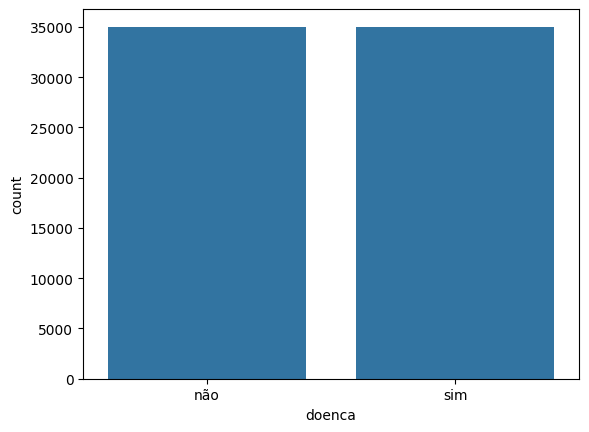

In [ ]:
# Entendendo quantidade de pessoas com e sem problemas cardiovasculares
sns.countplot(x="doenca", data=df);

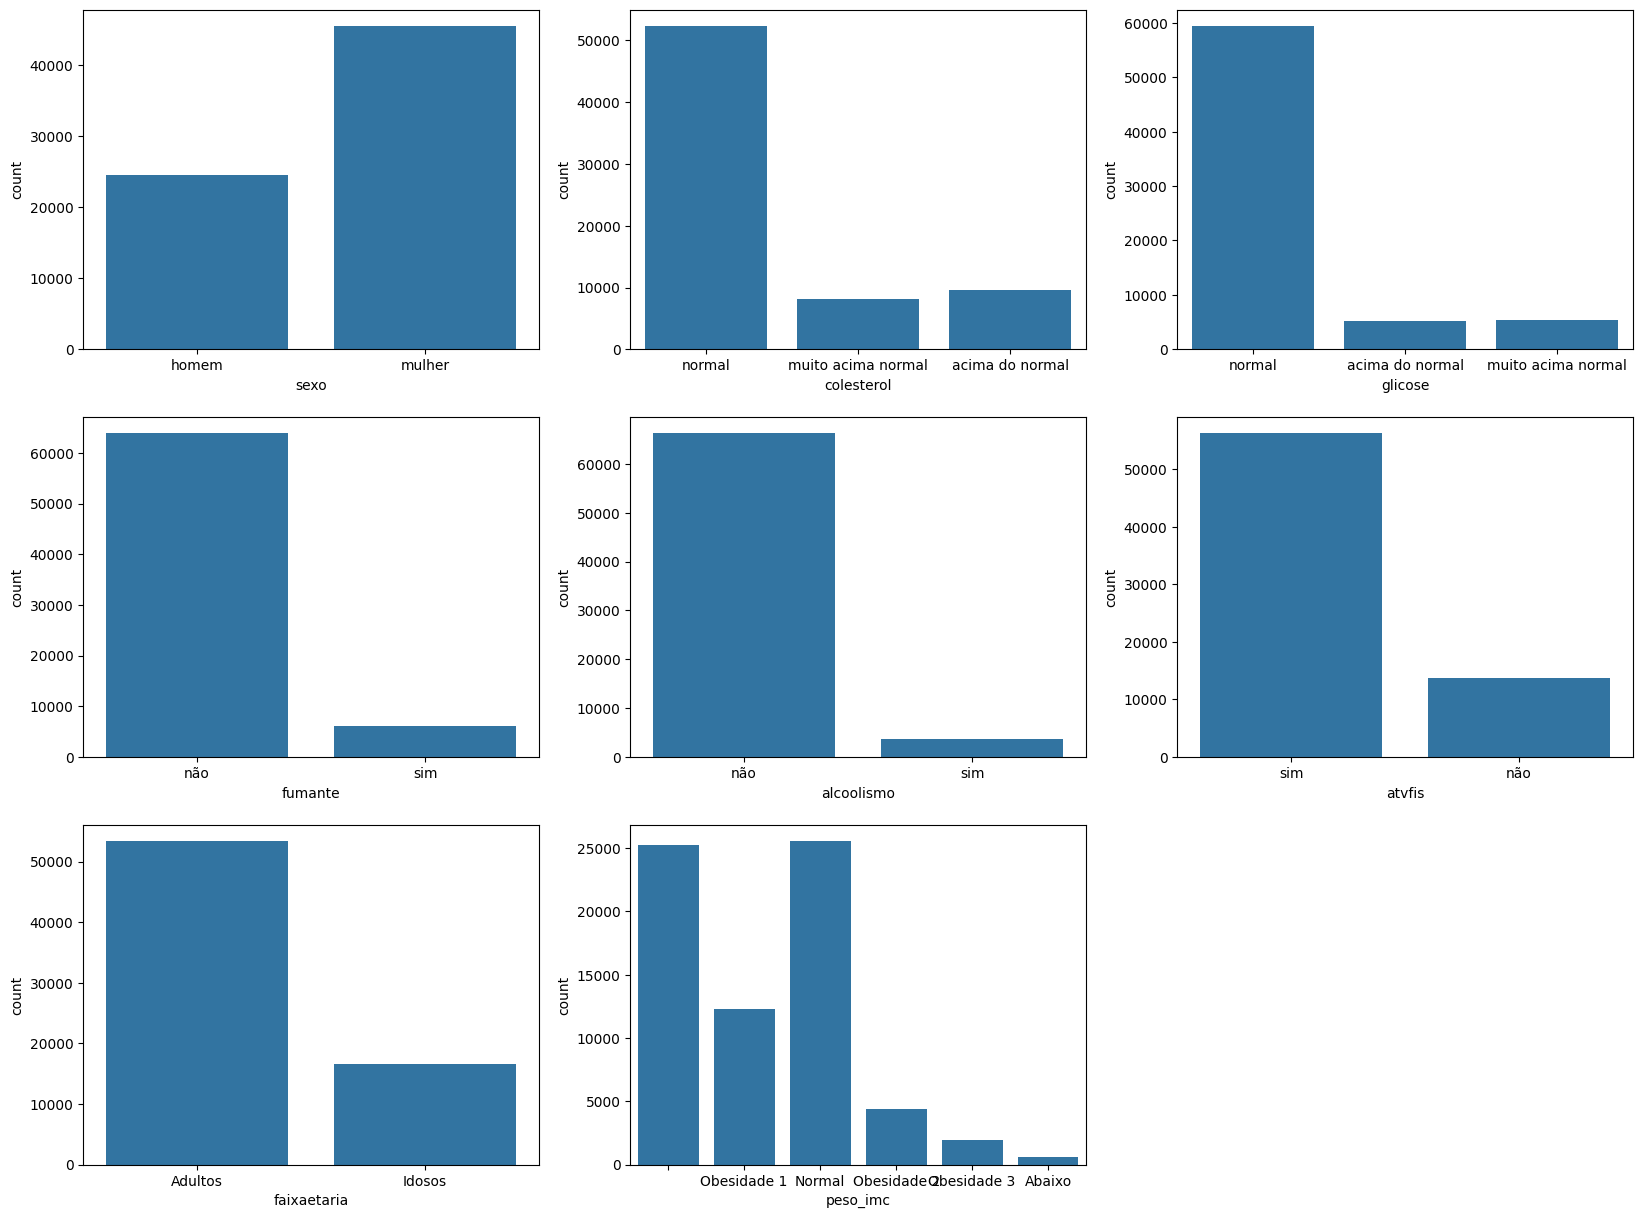

In [ ]:
#dados categóricos, usando apenas os dados de tipo objeto
# quero entender melhor a quantidade de dados em cada situação das seguites
#sexo, colestero, glicose, fumante, alcoolismo, atividade fisica

cat = df.select_dtypes(include="object")

# Define o tamanho da figura
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.countplot(x="sexo", data=cat);

plt.subplot(3, 3, 2)
sns.countplot(x="colesterol", data=cat);

plt.subplot(3, 3, 3)
sns.countplot(x="glicose", data=cat);

plt.subplot(3, 3, 4)
sns.countplot(x="fumante", data=cat);

plt.subplot(3, 3, 5)
sns.countplot(x="alcoolismo", data=cat);

plt.subplot(3, 3, 6)
sns.countplot(x="atvfis", data=cat);

plt.subplot(3, 3, 7)
sns.countplot(x="faixaetaria", data=cat);

plt.subplot(3, 3, 8)
sns.countplot(x="peso_imc", data=cat);

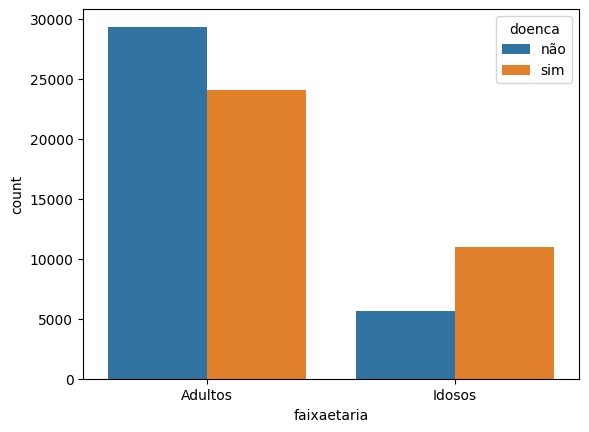

In [ ]:
# trabalhando com a primeira hipótese
# Quanto mais velha uma pessoa, maior a probabilidade de ela ficar doente.
# Dessa forma são muitos dados, vou criar algumas condições pra facilitar
# a visualização dos dados
sns.countplot(x="faixaetaria", data=df, hue="doenca");
#verdade

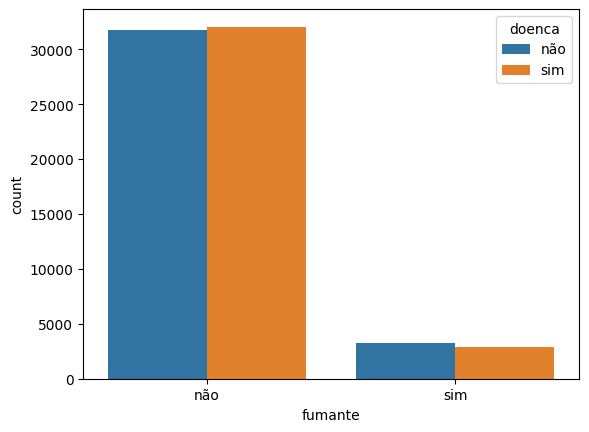

In [ ]:
# trabalhando com a segunda hipótese
# Quem fuma tem mais chance de ficar ter doença cardiovascular.
sns.countplot(x="fumante", data=df, hue="doenca");
#mentira

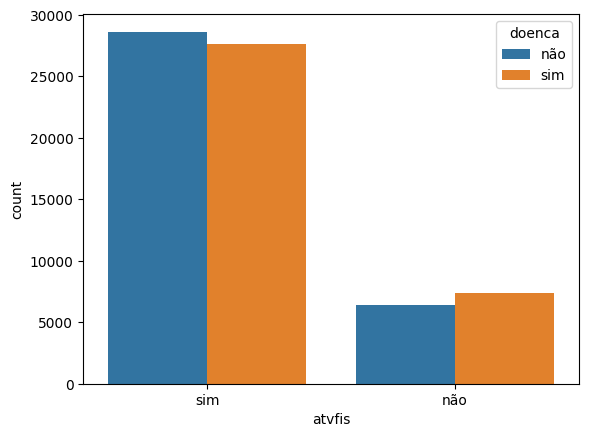

In [ ]:
# trabalhando com a terceira hipótese
# ser ativo fisicamente interefere se você pode ou não ter doença cardiovascular

sns.countplot(x="atvfis", data=df, hue="doenca");
#verdade

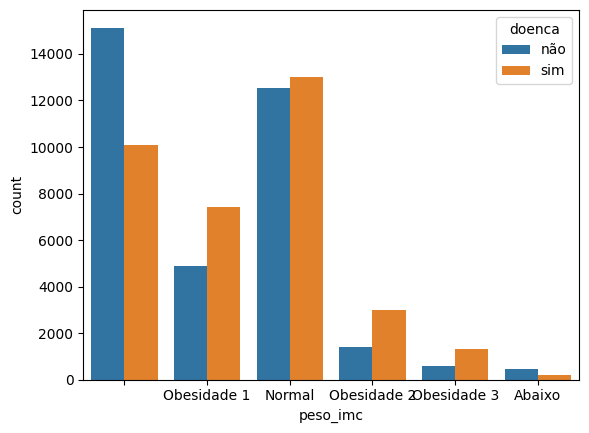

In [ ]:
# Trabalhando com a quarta hipotese
# Quanto mais obesa uma pessoa for, maior será a chance de adoecer.
sns.countplot(x="peso_imc", data=df, hue="doenca");
#verdade

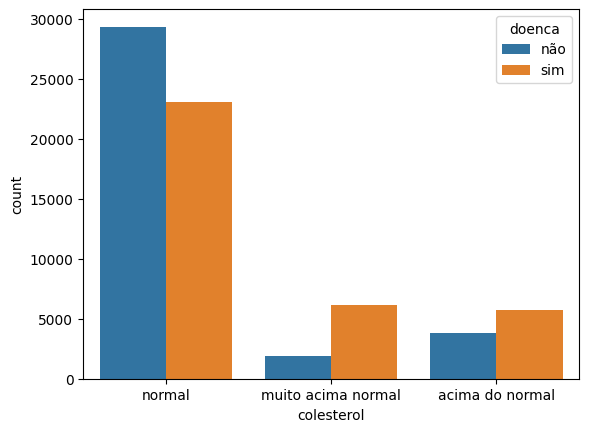

In [ ]:
# trabalhando com a quinta hipotese
# # Colesterol alto significa que a pessoa pode ter problemas cardíacos.
# verdade
sns.countplot(x="colesterol", data=df, hue="doenca");


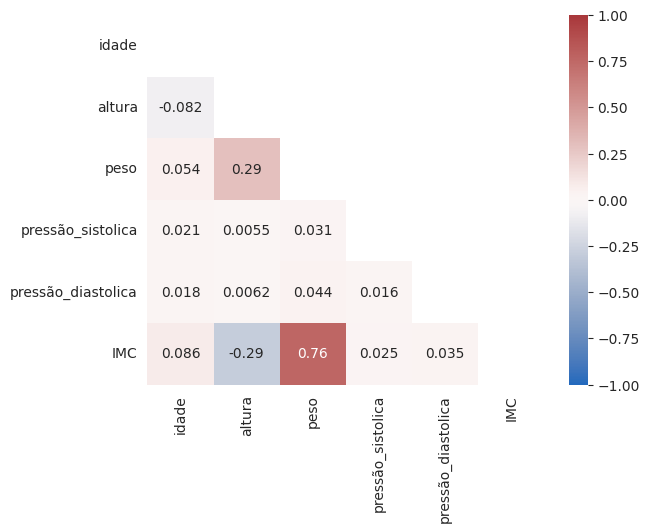

In [ ]:
# analise de variaveis numéricas
# fazendo correlação

cat = df.select_dtypes(exclude="object").drop("id", axis=1)
corr = cat.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, mask=mask, center=0, cmap="vlag");

In [ ]:
df2 = pd.read_csv("cardio_train.csv", sep=";", low_memory=False)

In [ ]:
df2.columns = ["id", "idade", "sexo", "altura", "peso", "pressão_sistolica", "pressão_diastolica", "colesterol", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]

df2.head()

,id,idade,sexo,altura,peso,pressão_sistolica,pressão_diastolica,colesterol,glicose,fumante,alcoolismo,atvfis,doenca
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Seleciona os recursos (features) e o alvo (target)
features = ['idade', 'atvfis', 'altura', 'colesterol', 'pressão_sistolica', 'pressão_diastolica']
target = 'doenca'

X = df2[features]
y = df2[target]

# Divide os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancia o modelo RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.6849285714285714
